In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(palette="colorblind")
%matplotlib inline

In [9]:
data_path = "/workspaces/Deep-Voice-Deep-Fake-Voice-Recognition/dataset/deep_voice.csv"
raw_data = pd.read_csv(filepath_or_buffer=data_path)

target_map = lambda label: 1 if label=='FAKE' else 0
raw_data.LABEL = raw_data.LABEL.map(arg=target_map, na_action='ignore')

raw_data.columns

Index(['chroma_stft', 'rms', 'spectral_centroid', 'spectral_bandwidth',
       'rolloff', 'zero_crossing_rate', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4',
       'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11',
       'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17', 'mfcc18',
       'mfcc19', 'mfcc20', 'LABEL'],
      dtype='object')

In [25]:
raw_data.describe().T

,count,mean,std,min,25%,50%,75%,max
chroma_stft,11778.0,0.421925,0.069392,0.200353,0.372330,0.417708,0.467741,0.707202
rms,11778.0,0.037894,0.028071,0.000043,0.015098,0.031870,0.054046,0.168958
spectral_centroid,11778.0,2719.201373,1066.754739,756.163229,2062.875836,2579.963841,3283.857559,17685.006690
spectral_bandwidth,11778.0,3050.299988,872.258653,1096.903152,2569.289971,3055.863462,3581.271953,7836.844404
rolloff,11778.0,4977.617722,2170.158448,1063.964279,3448.144178,4683.958018,6211.301553,21130.544670
zero_crossing_rate,11778.0,0.070821,0.039292,0.015504,0.045749,0.060237,0.085149,0.812480
mfcc1,11778.0,-382.562312,79.593413,-1055.002197,-432.928848,-365.756241,-321.772781,-193.430145
mfcc2,11778.0,145.056311,36.188506,-83.816765,120.522711,145.970162,168.321331,284.727997
mfcc3,11778.0,-24.699932,27.728976,-132.491104,-35.550402,-19.164229,-6.235028,67.475792
mfcc4,11778.0,21.311292,22.480432,-47.770000,3.635681,22.218458,37.017731,86.585747


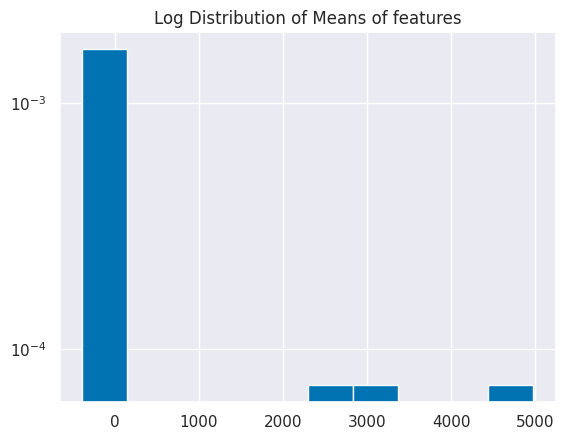

In [27]:
plt.hist(raw_data.describe().iloc[1, :-1], density=True, log=True)
plt.title("Log Distribution of Means of features")
plt.show()

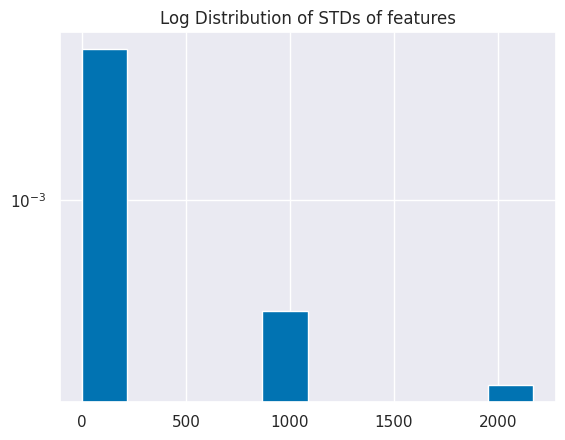

In [28]:
plt.hist(raw_data.describe().iloc[2, :-1], density=True, log=True)
plt.title("Log Distribution of STDs of features")
plt.show()

Note 1: As it can be seen from the description above, given data set doesn't contain Null values. On the other hand, distribution of different data columns are hugely varying indicating a need for normalization before modelling

In [15]:
feature_names = raw_data.columns[:-1]
targe_name = raw_data.columns[-1]
mfcc_col_names = spike_cols = [col for col in feature_names if 'mfcc' in col]
non_mfcc_columns = list(set(feature_names) - set(mfcc_col_names))

Let's perform train/val/test split and analyze training portion of the dataset.
It should be noted that we will set random_seed s.t. experiments will become reproducable

In [29]:
from sklearn.model_selection import train_test_split
random_state = 42

X = raw_data.loc[:, feature_names]
y = raw_data["LABEL"]

# Do train/validation/test split with 60%/20%/20% distribution.
# Use the train_test_split function and set the random_state parameter to 1.
X_full_train, X_test, y_full_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                              random_state=random_state)
X_train, X_val, y_train, y_val = train_test_split(X_full_train, y_full_train, 
                                                  test_size=0.25, random_state=random_state)

X_full_train.reset_index(drop=True, inplace=True)
X_train.reset_index(drop=True, inplace=True)
X_val.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)

y_full_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_val.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)


Let's analyze distribution of different features under 'fake' and 'real' data samples

In [ ]:
s

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score